In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import scipy.stats as spst

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


### 수치형 데이터
- 나이
- 출근 거리
- 월급
- 급여 인상률
- 총 경력 연수

### 범주형 데이터
- 성별
- 직무 만족도
- 결혼 상태
- 야근 여부

### 범주(x) -> 범주(y):이직여부

In [3]:
target = 'Attrition'

## (1) Gender --> Attrition

In [4]:
feature = 'Gender'

In [7]:
pd.crosstab(data[target], data[feature], normalize='columns')

Gender,Female,Male
Attrition,,
0,0.859275,0.822558
1,0.140725,0.177442


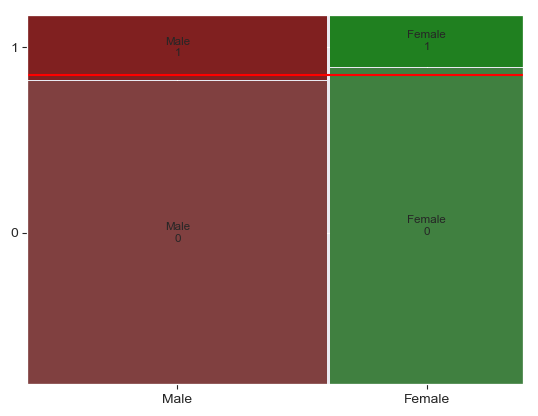

In [8]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

In [9]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             403   598
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 2.5537631338119975
p-value 0.1100318964829815
기대빈도
 [[392.5326087 608.4673913]
 [ 76.4673913 118.5326087]]


관련이 정말 적을까?

## (2) JobSatisfaction --> Attrition

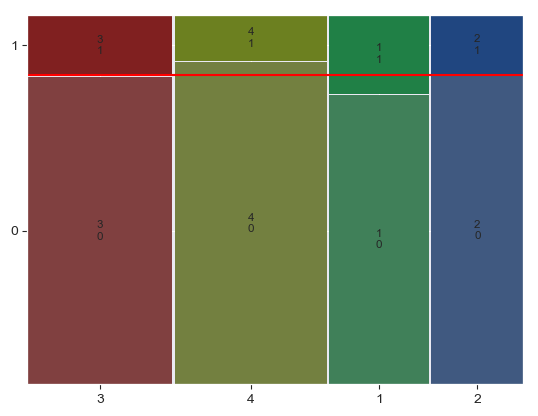

교차표
 JobSatisfaction    1    2    3    4
Attrition                          
0                191  189  295  326
1                 52   37   59   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.40684948576828
p-value 0.0383107376547955
기대빈도
 [[203.38043478 189.15217391 296.2826087  312.18478261]
 [ 39.61956522  36.84782609  57.7173913   60.81521739]]


In [10]:
feature = 'JobSatisfaction'
pd.crosstab(data[target], data[feature], normalize='columns')
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

전체 평균 이직률 대비 만족도가 가장 높은 경우(=4)는 이직을 하지 않았습니다. 그리고 만족도가 2, 3, 4 모두 전체 평균 이직률 대비 이직을 하지 않았다는 것을 확인할 수 있습니다.
전체 평균 이직률 대비 만족도가 가장 낮은 경우(=1)는 이직을 전부 하였다는 것을 확인할 수 있었습니다.
또한 자유도 = 3이고, 카이제곱 통계량은 8.4, p-value < 0.05 이기 때문에 관련성이 있다고 볼 수 있습니다.


## (3) MaritalStatus --> Attrition

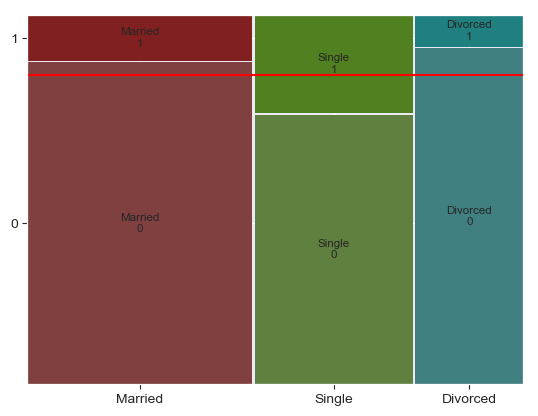

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   241      479     281
1                    23       69     103
----------------------------------------------------------------------------------------------------
카이제곱통계량 47.82247929575401
p-value 4.12553775054082e-11
기대빈도
 [[220.95652174 458.65217391 321.39130435]
 [ 43.04347826  89.34782609  62.60869565]]


In [11]:
feature = 'MaritalStatus'
pd.crosstab(data[target], data[feature], normalize='columns')
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

결혼 및 이혼을 한 경우, 이직하지 않은 사람들의 비율이 전체 평균 이직x 비율에 비해 높다는 것을 확인할 수 있습니다.
또한 결혼한 경우 이직을 하지 않은 사람들의 비율이 전체 직원들 가운데 가장 많다는 것을 확인할 수 있습니다.
반면 single의 경우, 이직률이 높다는 것을 확인할 수 있습니다.

## (4) OverTime --> Attrition

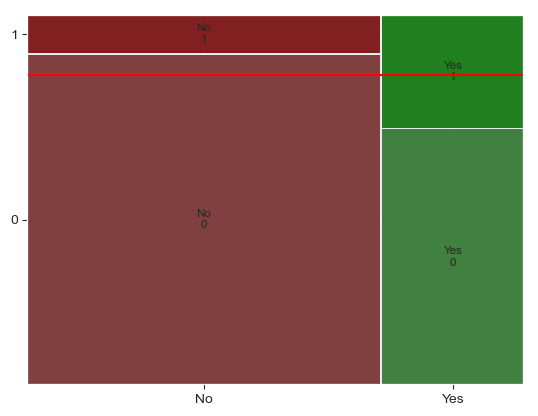

교차표
 OverTime    No  Yes
Attrition          
0          764  237
1           90  105
----------------------------------------------------------------------------------------------------
카이제곱통계량 71.28471646317081
p-value 3.092218315896121e-17
기대빈도
 [[714.76086957 286.23913043]
 [139.23913043  55.76086957]]


In [12]:
feature = 'OverTime'
pd.crosstab(data[target], data[feature], normalize='columns')
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

초과 근무를 하지 않는 사람들의 이직 비율이 낮다는 것을 확인할 수 있습니다.
반면 초과근무를 한 사람들은(야근). 이직 비율이 높다는 것을 확인할 수 있습니다.

# 3.숫자-->범주

## (1) Age --> Attrition

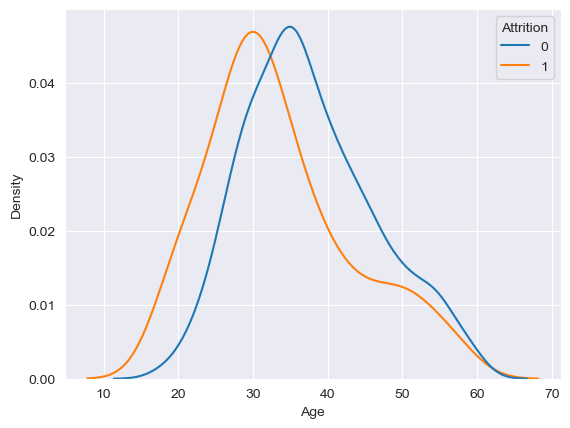

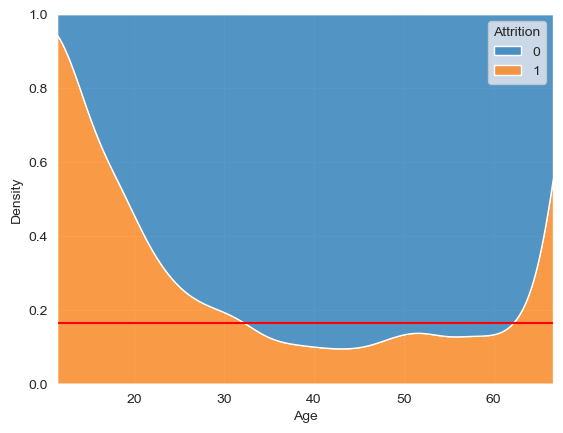

In [13]:
feature = 'Age'
sns.kdeplot(x=feature, data=data, hue=target, common_norm=False)
plt.show()
sns.kdeplot(x=feature, data=data, hue=target, multiple='fill')
plt.axhline(data[target].mean(), color='r')
plt.show()

대략 30살 ~ 60살의 경우 이직을 잘 하지 않음을 알 수 있습니다.

## (2) DistanceFromHome --> Attrition

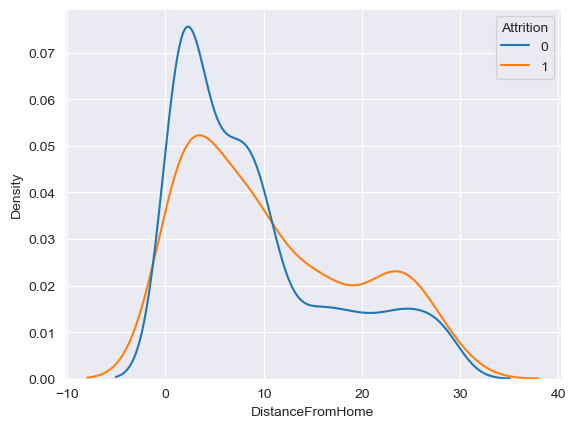

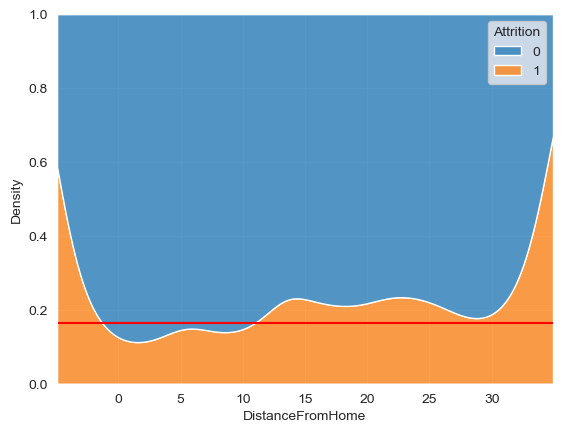

In [14]:
feature = 'DistanceFromHome'
sns.kdeplot(x=feature, data=data, hue=target, common_norm=False)
plt.show()
sns.kdeplot(x=feature, data=data, hue=target, multiple='fill')
plt.axhline(data[target].mean(), color='r')
plt.show()

집에서 회사까지의 거리가 0 ~ 10 마일 일경우 이직을 하지 않습니다.
멀수록 이직률이 높아지는 것을 확인할 수 있습니다.

## (3) MonthlyIncome --> Attrition

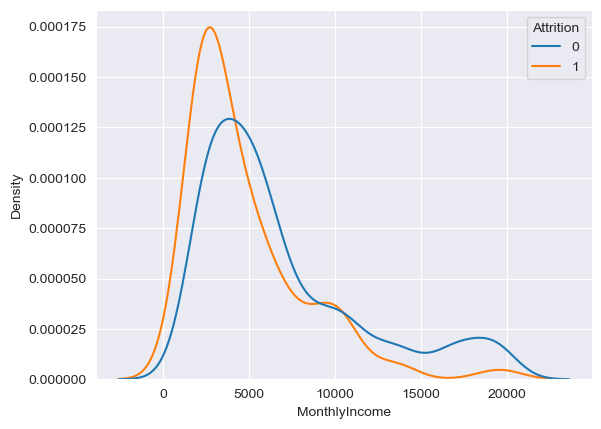

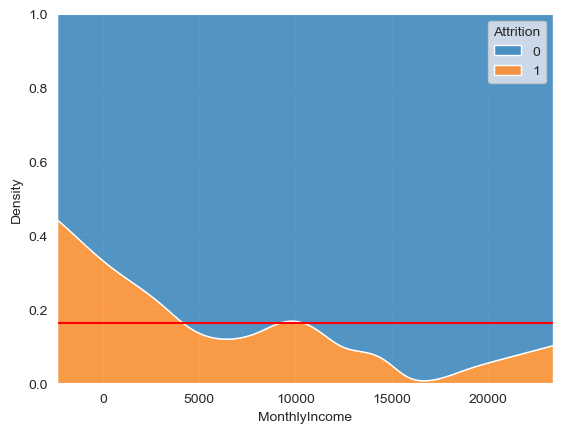

In [15]:
feature = 'MonthlyIncome'
sns.kdeplot(x=feature, data=data, hue=target, common_norm=False)
plt.show()
sns.kdeplot(x=feature, data=data, hue=target, multiple='fill')
plt.axhline(data[target].mean(), color='r')
plt.show()

월급은 적을 수록 이직률이 높고, 월급이 많으면 이직률이 적다.

## (4) PercentSalaryHike --> Attrition

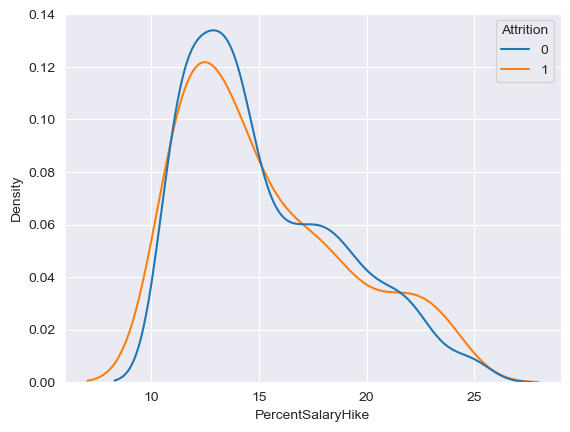

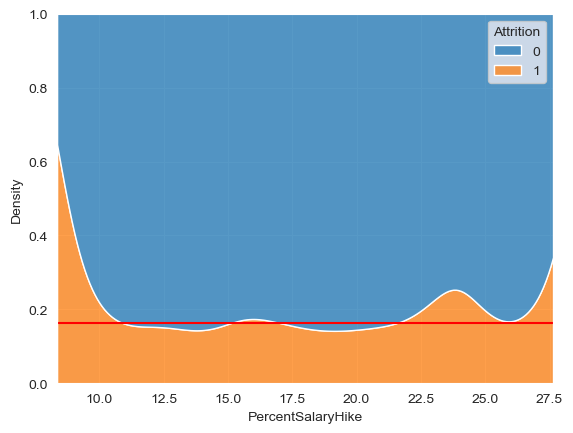

In [16]:
feature = 'PercentSalaryHike'
sns.kdeplot(x=feature, data=data, hue=target, common_norm=False)
plt.show()
sns.kdeplot(x=feature, data=data, hue=target, multiple='fill')
plt.axhline(data[target].mean(), color='r')
plt.show()

특이 포인트:
임금인상률은 관련은 있는데, 조금 관련이 있다. 임금인상률이 낮으면 이직률도 낮아요. 임금인상률이 높으면 이직률도 높다.
- 고액 연봉자들은 임금인상률이 높은 거 아니야?

## (5) TotalWorkingYears --> Attrition

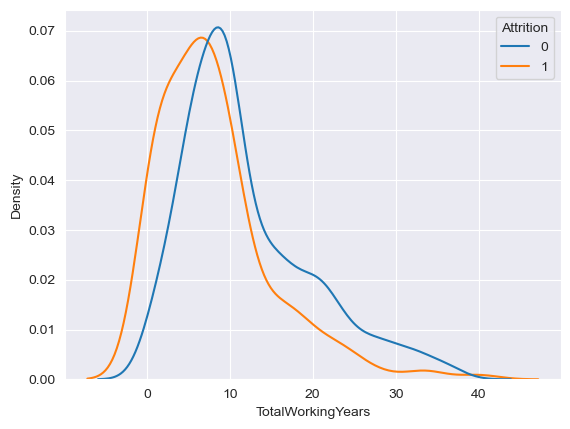

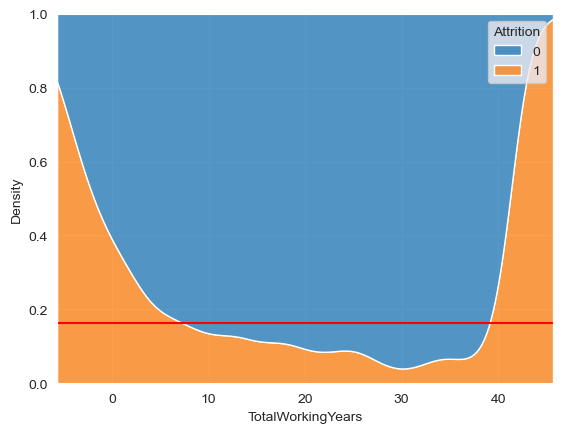

In [17]:
feature = 'TotalWorkingYears'
sns.kdeplot(x=feature, data=data, hue=target, common_norm=False)
plt.show()
sns.kdeplot(x=feature, data=data, hue=target, multiple='fill')
plt.axhline(data[target].mean(), color='r')
plt.show()

- 총경력연수는 'Age'와 비슷함, 오랫동안 직장생활을 안한 사람들은 이직률이 높고, 대략 7년정도 일한 사람들의 이직률은 낮아지는 것을 확인할 수 있다.